# Analyzing Amazon Sales data

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Load the Data

In [2]:
import os
os.chdir('E:/Unified Mentor/')

In [3]:
import pandas as pd
df = pd.read_csv('Amazon Sales data.csv')
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [5]:
df.shape

(100, 14)

In [6]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [10]:
df[['Order Date']].head()

,Order Date
0,2010-05-28
1,2012-08-22
2,2014-05-02
3,2014-06-20
4,2013-02-01


In [11]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [12]:
df[['Ship Date']].tail()

,Ship Date
95,2011-09-03
96,2011-12-28
97,2016-06-29
98,2015-08-08
99,2012-02-15


## Separating categorical and continious features

In [13]:
cat = df.columns[df.dtypes=='object']

In [14]:
cat

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority'], dtype='object')

In [15]:
df[cat].describe()

,Region,Country,Item Type,Sales Channel,Order Priority
count,100,100,100,100,100
unique,7,76,12,2,4
top,Sub-Saharan Africa,The Gambia,Clothes,Offline,H
freq,36,4,13,50,30


In [16]:
con = df.columns[df.dtypes!='object']
con

Index(['Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [17]:
df[con].describe()

,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100,1.000000e+02,100,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,2013-09-16 14:09:36,5.550204e+08,2013-10-09 22:48:00,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
min,2010-02-02 00:00:00,1.146066e+08,2010-02-25 00:00:00,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2012-02-14 12:00:00,3.389225e+08,2012-02-24 18:00:00,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,2013-07-12 12:00:00,5.577086e+08,2013-08-11 12:00:00,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,2015-04-07 00:00:00,7.907551e+08,2015-04-28 00:00:00,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,2017-05-22 00:00:00,9.940222e+08,2017-06-17 00:00:00,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06
std,NaN,2.606153e+08,NaN,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
df.describe()

,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100,1.000000e+02,100,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,2013-09-16 14:09:36,5.550204e+08,2013-10-09 22:48:00,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
min,2010-02-02 00:00:00,1.146066e+08,2010-02-25 00:00:00,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2012-02-14 12:00:00,3.389225e+08,2012-02-24 18:00:00,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,2013-07-12 12:00:00,5.577086e+08,2013-08-11 12:00:00,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,2015-04-07 00:00:00,7.907551e+08,2015-04-28 00:00:00,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,2017-05-22 00:00:00,9.940222e+08,2017-06-17 00:00:00,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06
std,NaN,2.606153e+08,NaN,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05


In [20]:
df.groupby(df['Order Date'].dt.to_period('M'))['Total Profit']

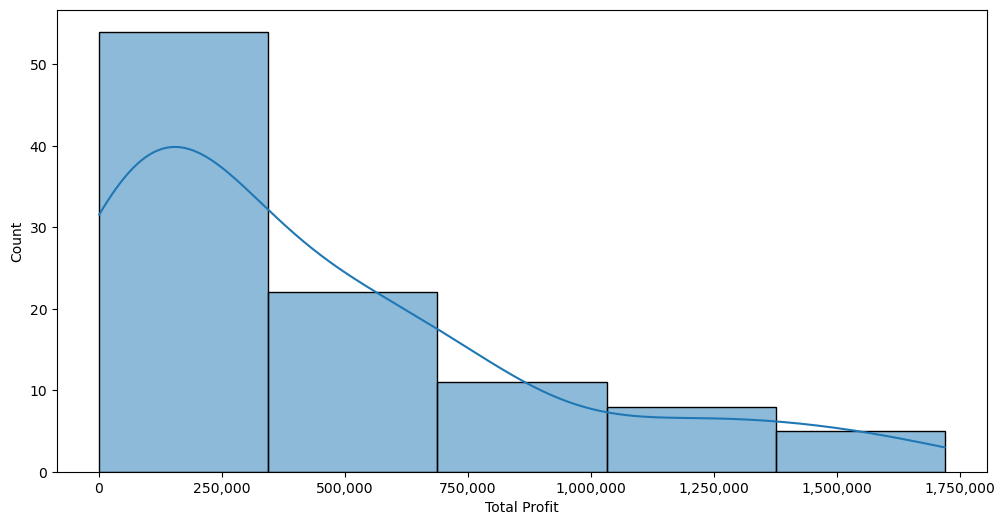

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(df['Total Profit'],bins=5,kde=True)
from matplotlib.ticker import FuncFormatter
def currency(x, pos):
    #The two args are the value and tick position
    return '{:,.0f}'.format(x)

formatter = FuncFormatter(currency)
plt.gca().xaxis.set_major_formatter(formatter)

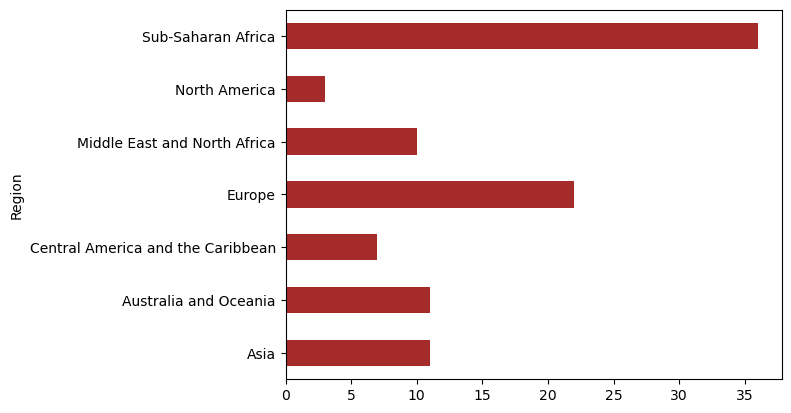

<Figure size 1200x600 with 0 Axes>

In [22]:
df.groupby(by='Region')['Region'].count().plot(kind='barh',color='brown')
plt.figure(figsize=(12,6))
plt.show()

### Which products are the best sellers?

Identification of top-selling products by revenue or units sold.

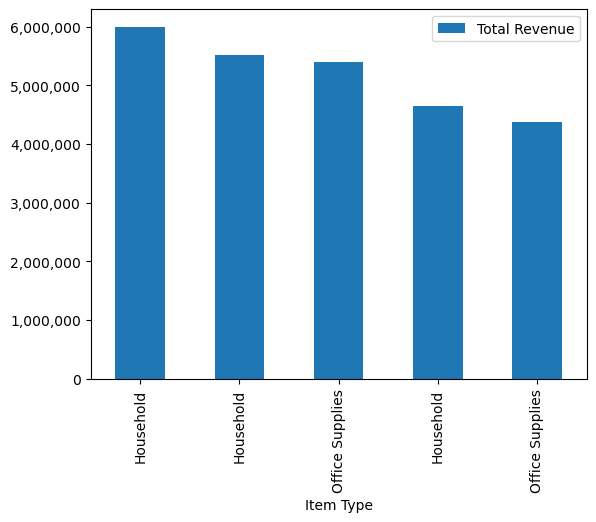

In [23]:
df.sort_values(by='Total Revenue', ascending=False)[['Item Type','Total Revenue']].head().plot(kind='bar',x='Item Type')
from matplotlib.ticker import FuncFormatter
def currency(x, pos):
    #The two args are the value and tick position
    return '{:,.0f}'.format(x)

formatter = FuncFormatter(currency)
plt.gca().yaxis.set_major_formatter(formatter)

### What are the sales trends by product category?

Analysis of sales performance within different product categories.

In [24]:
df.groupby(by=['Item Type','Sales Channel'])[['Units Sold','Total Profit']].sum().sort_values(by='Total Profit',ascending=False)

Units Sold  Total Profit
Item Type       Sales Channel                          
Household       Offline             44445    7365869.85
Cosmetics       Online              41969    7297150.03
                Offline             41749    7258898.63
Office Supplies Online              26168    3303710.00
Clothes         Offline             40871    3001566.24
Office Supplies Offline             20799    2625873.75
Baby Food       Offline             24098    2310034.28
Clothes         Online              30389    2231768.16
Cereal          Online              22116    1959256.44
Baby Food       Online              16447    1576609.42
Personal Care   Offline             40350    1011171.00
Vegetables      Online              14834     936470.42
Snacks          Online              13637     751944.18
Beverages       Offline             41588     651268.08
Meat            Online              10675     610610.00
Cereal          Offline              3761     333186.99
Vegetables      Offline              5217     329349.21
Beverages       Online              15120     236779.20
Personal Care   Online               8358     209451.48
Fruits          Online              36094      86986.54
Household       Online                282      46735.86
Fruits          Offline             13904      33508.64

### How do sales vary by region or location?

In [25]:
df.groupby(by='Region')[['Units Sold', 'Unit Price','Total Revenue']].sum()

,Units Sold,Unit Price,Total Revenue
Region,,,
Asia,59967,3693.90,21347091.02
Australia and Oceania,68325,2449.40,14094265.13
Central America and the Caribbean,35771,1702.21,9170385.49
Europe,98117,7237.55,33368932.11
Middle East and North Africa,48678,2415.06,14052706.58
North America,19143,831.73,5643356.55
Sub-Saharan Africa,182870,9346.28,39672031.43


In [26]:
average_order_value = df['Units Sold'].mean()
print("Average Order Value:", average_order_value)


Average Order Value: 5128.71


In [27]:
# Best-selling products
Top_products = df.groupby(by='Item Type')[['Units Sold']].sum().sort_values(by='Units Sold',ascending=False).head(10)
Top_products

,Units Sold
Item Type,
Cosmetics,83718
Clothes,71260
Beverages,56708
Fruits,49998
Personal Care,48708
Office Supplies,46967
Household,44727
Baby Food,40545
Cereal,25877


<Axes: >

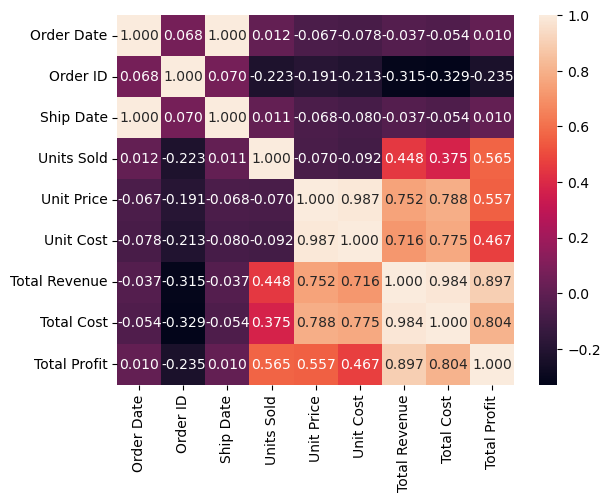

In [28]:
sns.heatmap(df[con].corr(),annot=True,fmt='.3f')

In [29]:
ctab = pd.crosstab(df['Region'], df['Item Type'])
ctab

Item Type,Baby Food,Beverages,Cereal,Clothes,Cosmetics,Fruits,Household,Meat,Office Supplies,Personal Care,Snacks,Vegetables
Region,,,,,,,,,,,,
Asia,0,0,0,2,1,1,2,0,2,1,0,2
Australia and Oceania,2,2,1,1,1,2,0,1,1,0,0,0
Central America and the Caribbean,0,1,1,1,1,0,1,0,0,1,1,0
Europe,4,2,0,3,5,0,2,0,3,2,0,1
Middle East and North Africa,0,0,1,2,3,3,0,0,1,0,0,0
North America,0,0,0,0,0,0,1,0,0,2,0,0
Sub-Saharan Africa,1,3,4,4,2,4,3,1,5,4,2,3


<Axes: xlabel='Item Type', ylabel='Region'>

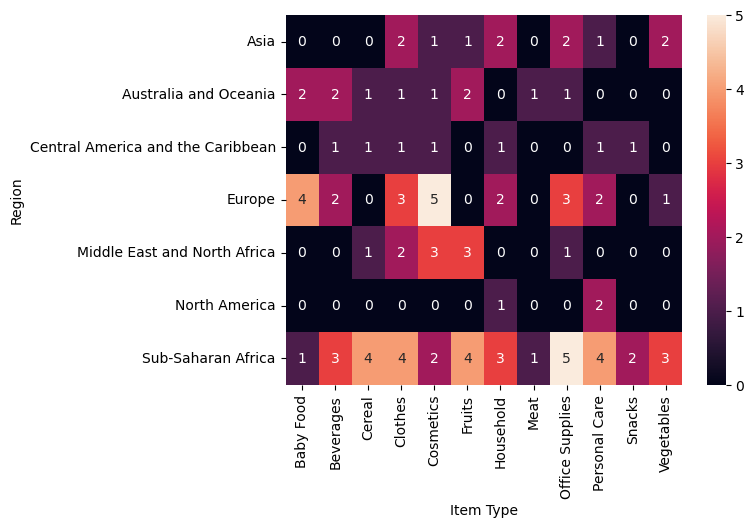

In [30]:
sns.heatmap(ctab, annot=True)

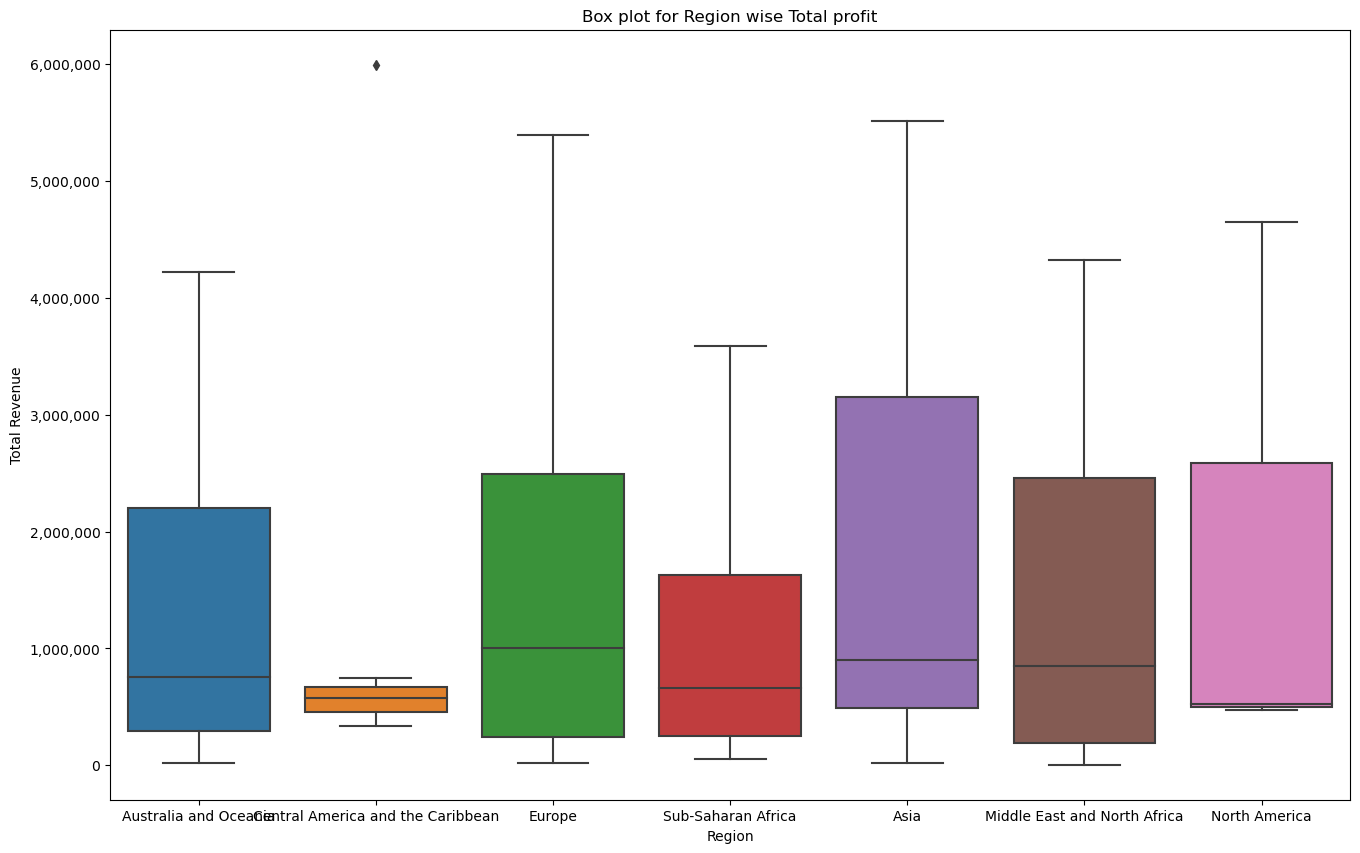

In [31]:
plt.figure(figsize=(16,10))
sns.boxplot(data=df,x = 'Region', y = 'Total Revenue')
from matplotlib.ticker import FuncFormatter
def currency(x, pos):
    #The two args are the value and tick position
    return '{:,.0f}'.format(x)

formatter = FuncFormatter(currency)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Box plot for Region wise Total profit')
plt.show()

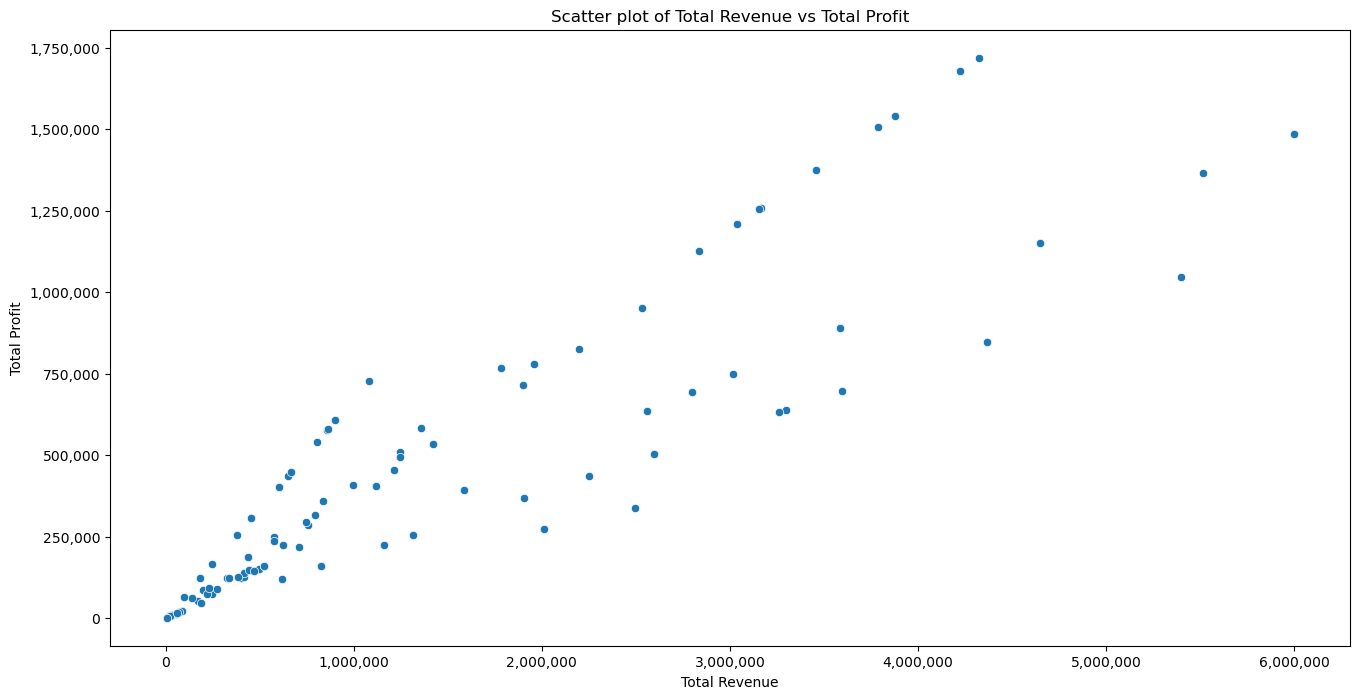

In [32]:
from matplotlib.ticker import FuncFormatter
# Create the scatter plot
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df, x='Total Revenue', y='Total Profit')

# Define a formatter function for currency
def currency(x, pos):
    'The two args are the value and tick position'
    return '{:,.0f}'.format(x)

formatter = FuncFormatter(currency)

# Apply the formatter to both axes
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Scatter plot of Total Revenue vs Total Profit')
plt.xlabel('Total Revenue')
plt.ylabel('Total Profit')
plt.show()


Amazon Sales Data Analysis


Number of records: 100
Number of features: 14


Missing values handled: Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64
Duplicates removed: 0


 Descriptive statistics:                 Order Date      Order ID            Ship Date   Units Sold  \
count                  100  1.000000e+02                  100   100.000000   
mean   2013-09-16 14:09:36  5.550204e+08  2013-10-09 22:48:00  5128.710000   
min    2010-02-02 00:00:00  1.146066e+08  2010-02-25 00:00:00   124.000000   
25%    2012-02-14 12:00:00  3.389225e+08  2012-02-24 18:00:00  2836.250000   
50%    2013-07-12 12:00:00  5.577086e+08  2013-08-11 12:00:00  5382.500000   
75%    2015-04-07 00:00:00  7.907551e+08  2015-04-28 00:00:00  7369.000000   
max    2017

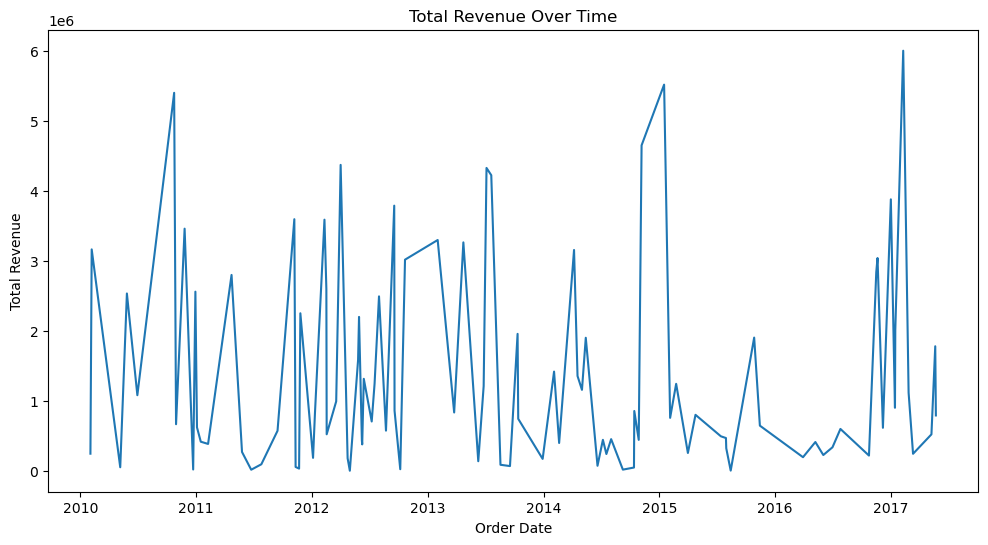

In [33]:
# Save figures
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Order Date', y='Total Revenue')
plt.title('Total Revenue Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Revenue')
plt.savefig('total_revenue_over_time.png')

# Create a summary report
print("Amazon Sales Data Analysis")

print('\n========================================================================================\n')
#1. Data Overview
print(f'Number of records: {len(df)}')
print(f'Number of features: {len(df.columns)}') 
print('\n========================================================================================\n')
#2. Data Cleaning
print(f'Missing values handled: {df.isnull().sum()}') 
print(f'Duplicates removed: {df.duplicated().sum()}')
print('\n========================================================================================\n')
#3. Data Exploration
print(f' Descriptive statistics: {df.describe()}')


<Figure size 1200x600 with 0 Axes>

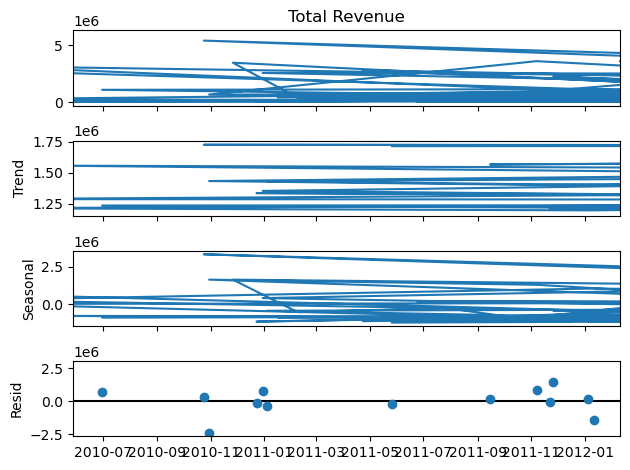

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
plt.figure(figsize=(12,6))
df.set_index('Order Date', inplace=True)
decomposition = seasonal_decompose(df['Total Revenue'], model='additive', period=30)
decomposition.plot()
plt.show()


### Conclusion :
In this analysis of Amazon sales data, we embarked on a comprehensive exploration and examination of various aspects of the sales metrics. The data cleaning process was pivotal in ensuring accuracy by handling missing values, converting data types, and removing duplicates. Through detailed data exploration, we obtained a robust understanding of the dataset's structure and main characteristics.

Our data visualizations revealed insightful patterns and trends. For instance, the total revenue exhibited noticeable fluctuations over time, indicating seasonal trends or promotional impacts. The distribution of total profit highlighted the variability in profit margins across different sales. Additionally, the regional analysis underscored significant differences in revenue generation, reflecting potential market dynamics and regional demand variations.

Statistical analysis further enriched our insights, with the correlation matrix revealing strong relationships between various features, such as units sold, unit price, and total revenue. The time series decomposition provided a clearer view of underlying trends, seasonal effects, and residuals in the sales data.

Overall, this analysis not only illuminated key trends and patterns within the Amazon sales data but also laid the groundwork for strategic decisions aimed at optimizing sales performance, enhancing regional marketing strategies, and improving inventory management. Future analyses could delve deeper into customer behavior, product-level profitability, and the impact of external factors such as economic shifts or competitor actions to further refine business strategies and drive growth.